In [2]:
from utils.download_kaggle_dataset import download_kaggle_competition
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from PIL import Image

import seaborn as sns
from pathlib import Path

In [17]:
data = Path(download_kaggle_competition("gan-getting-started"))

Unzipping files...
Competition data downloaded to: datasets


In [18]:
for dirname, _, filenames in os.walk(data):
    print(f"{dirname} - {len(filenames)} files")


datasets - 0 files
datasets/photo_jpg - 7038 files
datasets/monet_jpg - 300 files
datasets/photo_tfrec - 20 files
datasets/monet_tfrec - 5 files


In [19]:
PHOTO_JPG_DIR = data / "photo_jpg"
MONET_JPG_DIR = data / "monet_jpg"

In [20]:
print(f"Number of real photos: {len(os.listdir(PHOTO_JPG_DIR))}")
print(f"Number of Monet paintings: {len(os.listdir(MONET_JPG_DIR))}")


Number of real photos: 7038
Number of Monet paintings: 300


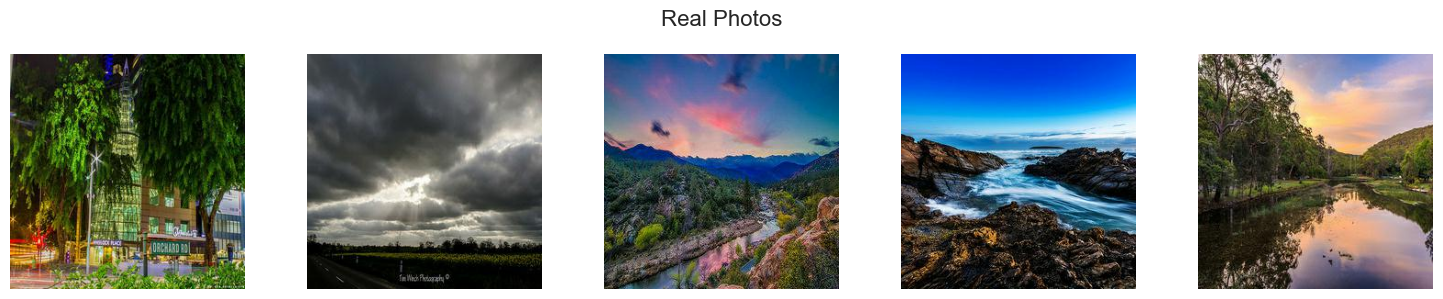

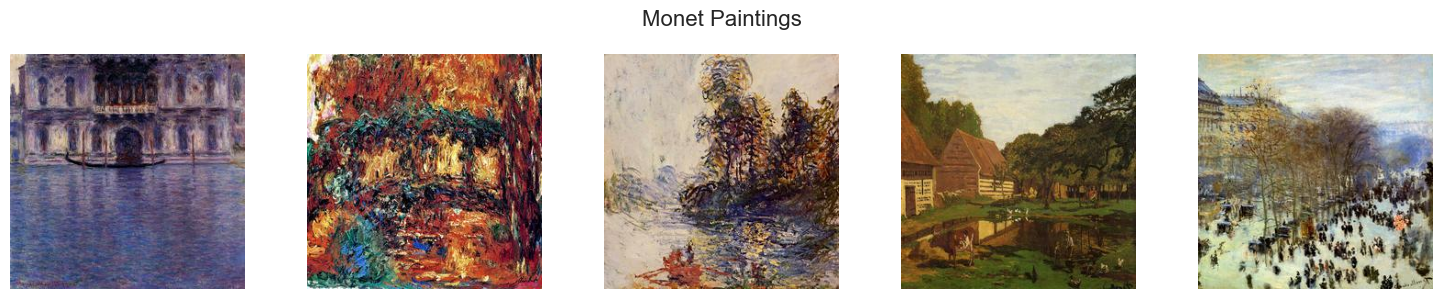

In [21]:
def show_images(image_paths, title, n=5):
    plt.figure(figsize=(15, 3))
    for i in range(n):
        img = Image.open(image_paths[i])
        plt.subplot(1, n, i + 1)
        plt.imshow(img)
        plt.axis("off")
    plt.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.show()

# Select random samples
photo_samples = random.sample(list(PHOTO_JPG_DIR.glob("*.jpg")), 5)
monet_samples = random.sample(list(MONET_JPG_DIR.glob("*.jpg")), 5)

show_images(photo_samples, "Real Photos")
show_images(monet_samples, "Monet Paintings")


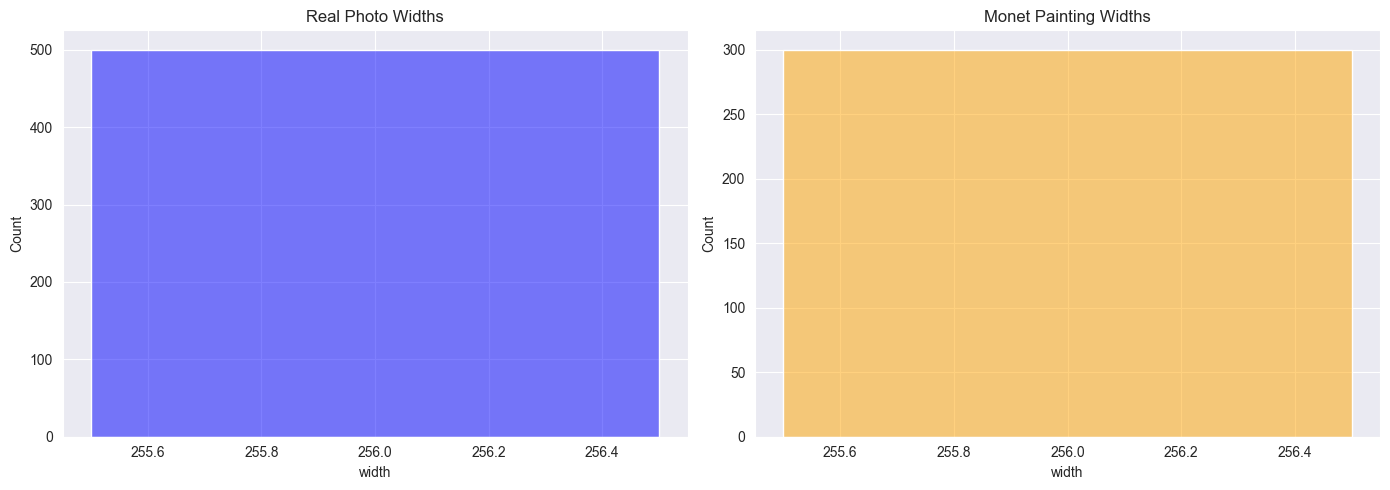

In [22]:
def get_image_sizes(img_paths):
    sizes = [Image.open(p).size for p in img_paths]
    df = pd.DataFrame(sizes, columns=["width", "height"])
    return df

photo_sizes_df = get_image_sizes(list(PHOTO_JPG_DIR.glob("*.jpg"))[:500])
monet_sizes_df = get_image_sizes(list(MONET_JPG_DIR.glob("*.jpg")))

# Plot
fig, axs = plt.subplots(1, 2, figsize=(14, 5))
sns.histplot(photo_sizes_df["width"], ax=axs[0], color="blue", kde=True)
sns.histplot(monet_sizes_df["width"], ax=axs[1], color="orange", kde=True)
axs[0].set_title("Real Photo Widths")
axs[1].set_title("Monet Painting Widths")
plt.tight_layout()
plt.show()


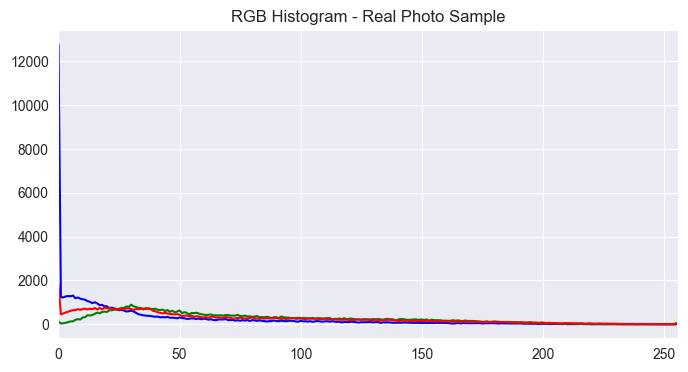

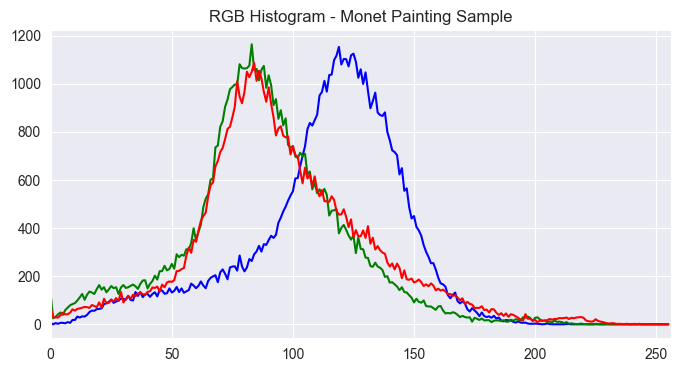

In [23]:
def plot_rgb_histogram(img_path, title):
    img = cv2.imread(str(img_path))
    color = ('b', 'g', 'r')
    plt.figure(figsize=(8, 4))
    for i, col in enumerate(color):
        hist = cv2.calcHist([img], [i], None, [256], [0, 256])
        plt.plot(hist, color=col)
        plt.xlim([0, 256])
    plt.title(f'RGB Histogram - {title}')
    plt.show()

plot_rgb_histogram(photo_samples[0], "Real Photo Sample")
plot_rgb_histogram(monet_samples[0], "Monet Painting Sample")


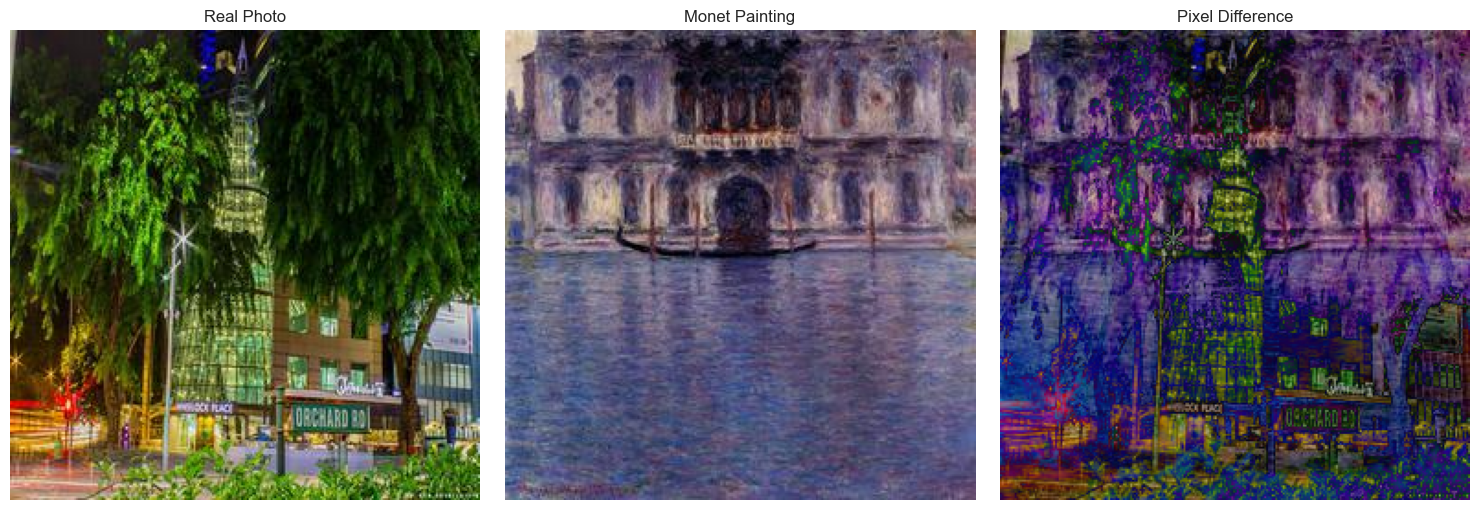

In [24]:
def visualize_difference(photo_path, monet_path):
    photo = np.array(Image.open(photo_path).resize((256, 256)))
    monet = np.array(Image.open(monet_path).resize((256, 256)))

    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    axes[0].imshow(photo)
    axes[0].set_title("Real Photo")
    axes[1].imshow(monet)
    axes[1].set_title("Monet Painting")
    diff = np.abs(photo.astype("int") - monet.astype("int")).astype("uint8")
    axes[2].imshow(diff)
    axes[2].set_title("Pixel Difference")
    for ax in axes:
        ax.axis("off")
    plt.tight_layout()
    plt.show()

visualize_difference(photo_samples[0], monet_samples[0])


In [25]:
photo_names = set(os.listdir(PHOTO_JPG_DIR))
monet_names = set(os.listdir(MONET_JPG_DIR))
print(f"Overlap between photo_jpg and monet_jpg: {len(photo_names & monet_names)}")


Overlap between photo_jpg and monet_jpg: 0
